<a href="https://colab.research.google.com/github/ecloguehwang/HSS/blob/master/%ED%95%A9%EB%B6%88%EC%9E%90%EB%A3%8C%EC%A0%95%EB%A6%ACA_%EC%9D%80%ED%8F%89%EA%B3%A02024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#colab에서 matplotlib와 sns 라이브러리 그래프 한글을 깨지지 않게 하는 법: 이 코드실행하고 런타임(runtime) 다시 실행하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
#pandas, openpyxl 라이브러리 부르기
import pandas as pd
import numpy as np
import os
import openpyxl
from tabulate import tabulate
import matplotlib.pyplot as plt


##  데이터 부르기
path = '/content/drive/MyDrive/python/habbul/'
df = pd.read_excel(f'{path}eunpyeong_2024_habbul.xlsx')


# 첫 5줄을 봅니다.
df.tail(2)

In [2]:
#matplotlib에서 한글구현
plt.rc('font', family='NanumBarunGothic')

#그래프 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
#1. 서울주요대학(14개대) 중복합격자 포함된 합격자수

import os
import pandas as pd

uni = ['서울대', '연세대', '고려대', '서강대', '성균관대', '한양대', '중앙대', '경희대', '한국외대', '서울시립대', '이화여대', '건국대', '동국대', '홍익대']

# 서울 주요대학 수시합격자수 출력
print("\n***2024학년도 E고 합격건수***")

total_accepted = 0  # Variable to store the total number of accepted students

for u in range(len(uni)):
    df_u = df[(df.대학 == uni[u]) & (df.최종 == '합')]
    accepted_count = len(df_u['대학'])
    total_accepted += accepted_count
    print(uni[u], str(accepted_count) + "건")

print(f"\n총 합격자 수: {total_accepted}건")

In [ ]:
#1-1. 서울주요대 합격자수: 리스트

import pandas as pd
import matplotlib.pyplot as plt


#표시할 대학리스트
uni = ['서울대', '연세대', '고려대', '서강대', '성균관대', '한양대', '중앙대', '경희대', '한국외대', '서울시립대', '이화여대', '건국대', '동국대', '홍익대',
       '숙명여대', '국민대', '숭실대', '세종대', '서울과기대', '광운대', '명지대', '상명대', '가톨릭대(성심)', '가천대(글로벌)']


# 데이터 부르기
path = '/content/drive/MyDrive/python/habbul/'
df = pd.read_excel(f'{path}eunpyeong_2024_habbul.xlsx')


# '지원시기'열의 값 변경: 가,나
df['지원시기'] = df['지원시기'].replace({'가': '정시', '나': '정시', '다': '정시',
                                       '수시1차': '수시', '수시2차': '수시'})

# 빈 리스트
uni_new = []
num_su = []
num_je = []


# 리스트에 새로운 대학리스트와, 수시합격자, 정시합격자를 담기
for u in uni:
    df_u = df[(df.대학 == u) & (df.최종 == '합')]
    df_u = df_u[['지원시기', '학번', '대학', '최종']]

    num_su_u = len(df_u[df_u['지원시기'] == '수시'])
    num_je_u = len(df_u[df_u['지원시기'] == '정시'])


    if num_su_u >= 1 or num_je_u >= 1:  # '지원시기'열의 값이 1 이상일 때만 값을 표시
        uni_new.append(u)
        num_su.append(num_su_u)
        num_je.append(num_je_u)

        print(u, "합격자수 - 수시:", str(num_su_u) + "명,", "정시:", str(num_je_u) + "명")
        print("-----------------------------------------\n")

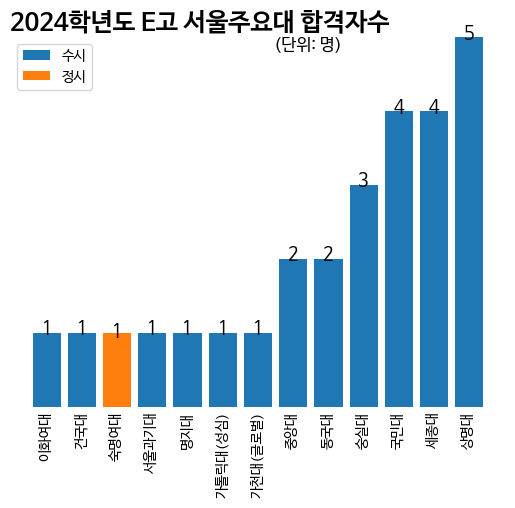

In [3]:
#2. 서울주요대 합격자수: 세로 막대그래프

import pandas as pd
import matplotlib.pyplot as plt


#표시할 대학리스트
uni = ['서울대', '연세대', '고려대', '서강대', '성균관대', '한양대', '중앙대', '경희대', '한국외대', '서울시립대', '이화여대', '건국대', '동국대', '홍익대',
       '숙명여대', '국민대', '숭실대', '세종대', '서울과기대', '광운대', '명지대', '상명대', '가톨릭대(성심)', '가천대(글로벌)']


# 데이터 부르기
path = '/content/drive/MyDrive/python/habbul/'
df = pd.read_excel(f'{path}eunpyeong_2024_habbul.xlsx')


# '지원시기'열의 값 변경: 가,나
df['지원시기'] = df['지원시기'].replace({'가': '정시', '나': '정시', '다': '정시',
                                       '수시1차': '수시', '수시2차': '수시'})

# 빈 리스트
uni_new = []
num_su = []
num_je = []


# 리스트에 새로운 대학리스트와, 수시합격자, 정시합격자를 담기
for u in uni:
    df_u = df[(df.대학 == u) & (df.최종 == '합')]
    df_u = df_u[['지원시기', '학번', '대학', '최종']]

    num_su_u = len(df_u[df_u['지원시기'] == '수시'])
    num_je_u = len(df_u[df_u['지원시기'] == '정시'])


    if num_su_u >= 1 or num_je_u >= 1:  # '지원시기'열의 값이 1 이상일 때만 값을 표시
        uni_new.append(u)
        num_su.append(num_su_u)
        num_je.append(num_je_u)

        #print(u, "합격자수 - 수시:", str(num_su_u) + "명,", "정시:", str(num_je_u) + "명")
        #print("-----------------------------------------\n")


# 지원시기가 1 이상인 데이터만 사용
num_su = [su for su, je in zip(num_su, num_je) if su >= 1 or je >= 1]
num_je = [je for su, je in zip(num_su, num_je) if su >= 1 or je >= 1]
uni_new = [uni for uni, su, je in zip(uni_new, num_su, num_je) if su >= 1 or je >= 1]


if len(uni_new) > 0:
    # sort the data by the total number of admissions (sum of num_su and num_je)
    data = sorted(zip(uni_new, num_su, num_je), key=lambda x: x[1]+x[2], reverse=False)
    uni_new = [x[0] for x in data]
    num_su = [x[1] for x in data]
    num_je = [x[2] for x in data]

    # plot the bar graph
    fig, ax = plt.subplots()
    ax.bar(uni_new, num_su, label='수시')
    ax.bar(uni_new, num_je, bottom=num_su, label='정시')


    # add value labels
    for i, (su, je) in enumerate(zip(num_su, num_je)):
        if su >= 1:
            ax.text(i, su+0.05, su, ha='center', va='center', fontsize=13)
        if je >= 1:
            ax.text(i, su + je+0.02, je, ha='center', va='center', fontsize=13)

    # 범례
    ax.legend()

    # 그래프 제목
    ax.set_title('2024학년도 E고 서울주요대 합격자수', fontsize=18, fontweight='bold', loc='left')

    # 그래프 부제목
    ax.text(0.6, 1.00, '(단위: 명)', ha='center', va='top', transform=ax.transAxes, fontsize=12)


    # X축 눈금(ticks) 제거
    ax.tick_params(axis='x', which='both', length=0)


    plt.xticks(rotation= 90)  # x축 45도 회전
    plt.box(False)  # 테두리 박스 제거
    plt.yticks([])  # y축 제거

    path = '/content/drive/MyDrive/python/eunpyeong/result_habbul/'
    plt.savefig(f'{path}pass_2024_은평고_합격자막대그래프.png')
    plt.savefig(f'{path}pass_2024_은평고_합격자막대그래프.pdf')
    plt.show()
else:
    print("아쉽게도 그래프를 그릴 합격자가 없습니다.")

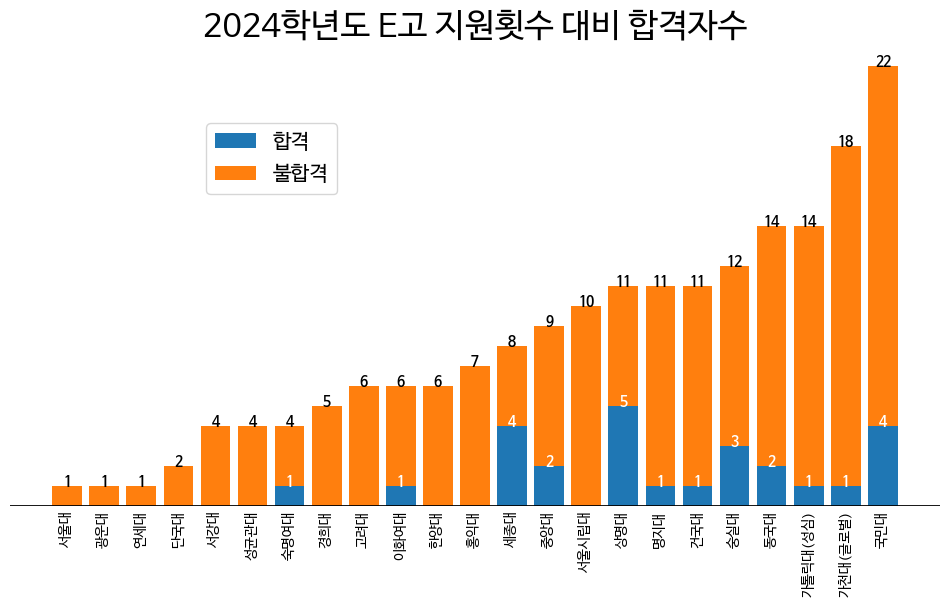

In [81]:
#3. 서울주요대 지원대비 합격자 및 불합격자

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 데이터 부르기
path = '/content/drive/MyDrive/python/habbul/'
df = pd.read_excel(f'{path}eunpyeong_2024_habbul.xlsx')

uni = ['서울대', '연세대', '고려대', '서강대', '성균관대', '한양대', '중앙대', '경희대', '한국외대', '서울시립대', '이화여대',
       '건국대', '동국대', '홍익대','숙명여대', '국민대', '숭실대', '세종대', '단국대', '광운대', '명지대', '상명대', '가천대(글로벌)', '가톨릭대(성심)']


# create a new DataFrame containing the number of applications and acceptance for each university and sort it in ascending order by number of applications
num_applications = []
num_acceptance = []
for u in uni:
    uni_admissions = df[df['대학'] == u]
    num_app = len(uni_admissions)
    num_acc = len(uni_admissions[uni_admissions['최종'] == '합'])
    num_applications.append(num_app)
    num_acceptance.append(num_acc)

admission_df = pd.DataFrame({'대학': uni, '지원건수': num_applications, '합격건수': num_acceptance})


# 빈도가 0인 경우 해당 label을 x축 label에서 제거
admission_df = admission_df[admission_df['지원건수'] != 0]

# 그래프를 오름차순으로 정렬하기
admission_df = admission_df.sort_values('지원건수')


# create a vertical stacked bar plot of the number of applications and acceptance
plt.figure(figsize=(12,6))
plt.bar(x='대학', height='합격건수', data=admission_df, bottom=0, label='합격')
plt.bar(x='대학', height= admission_df['지원건수']- admission_df['합격건수'], data=admission_df, bottom=admission_df['합격건수'],
        label='불합격')


plt.xticks(rotation=90, ha='center')
plt.title('2024학년도 E고 지원횟수 대비 합격자수', fontsize=24)

# add labels on top of the bars for the number of accepted applicants
for i, v in enumerate(admission_df['합격건수']):
    if v > 0:
        plt.text(i, v, str(v), color='white', ha='center', fontweight='bold')  #글자색 white
        #plt.text(i, v, str(v), color='black', ha='center', fontweight='bold') #글자색 black

for a, b in enumerate(admission_df['지원건수']):
    if b > 0:
        plt.text(a, b, str(b), color='black', ha='center', fontweight='bold')

# modify the y-tick range to start from 1 instead of 0
plt.yticks(np.arange(1, 21, 2))

# y축 제거
plt.yticks([])

# remove ticks and spines from the y-axis and top x-axis
plt.tick_params(axis='y', which='both', length=0)  # remove ticks from y-axis
#plt.tick_params(axis='x', which='both', length=0, top=False)  # remove ticks from top x-axis
plt.gca().spines['top'].set_visible(False)  # remove spine from top x-axis
plt.gca().spines['right'].set_visible(False)  # remove spine from right y-axis
plt.gca().spines['left'].set_visible(False)  # remove spine from right y-axis
plt.gca().spines['bottom'].set_visible(False)  # remove spine from right y-axis

# create a horizontal line on the x-axis
plt.axhline(y=0, color='black', linewidth=2)

# move the legend to the right and adjust its position
plt.legend(fontsize = 15, loc='upper left', bbox_to_anchor=(0.2, 0.85))

# X축 눈금(ticks) 제거
plt.tick_params(axis='x', which='both', length=0)
# adjust the spacing of the plot to make room for the legend
#plt.subplots_adjust(right=0.75)

#저장
path1 = '/content/drive/MyDrive/python/eunpyeong/result_png/'
path2 = '/content/drive/MyDrive/python/eunpyeong/result_pdf/'


plt.savefig(f'{path1}pass_2024_은평고_지원건수대비합격.png')
plt.savefig(f'{path2}pass_2024_은평고_지원건수대비합격.pdf')

plt.show()

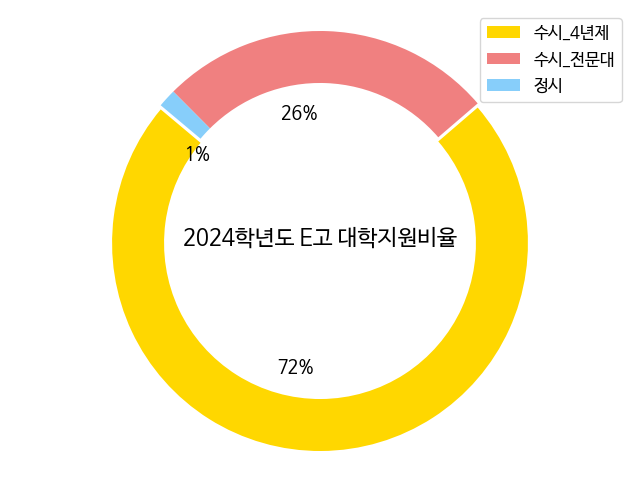

In [ ]:
#4. 진학지원비율 그래프

import pandas as pd
import matplotlib.pyplot as plt

# 조건에 따라 '지원시기'열의 값 변경
df['지원시기'] = df['지원시기'].replace({'가': '정시', '나': '정시', '다': '정시', '정시1차':'정시',
                                       '수시1차': '수시_전문대', '수시2차': '수시_전문대', '수시': '수시_4년제'})


# 변경된 '지원시기'열의 값으로 groupby하여 빈도 계산
frequency = df.groupby('지원시기').size().reset_index(name='빈도')


# 각 항목별 비율 계산하여 '비율' 열에 저장
frequency['비율(%)'] = (frequency['빈도'] / frequency['빈도'].sum() * 100).astype(int)


# 데이터프레임에서 '지원시기'와 '빈도' 열 추출
labels = frequency['지원시기']
sizes = frequency['빈도']
colors = ['gold', 'lightcoral', 'lightskyblue']
explode = (0.02, 0, 0)  # 각 조각이 도넛에서 얼마나 떨어져 있는지 설정



# Ensure that explode has the same length as sizes
if len(explode) != len(sizes):
    explode = tuple(0 for _ in sizes)  # Set all explode values to 0 if lengths don't match


# 도넛 차트 생성
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(sizes, explode=explode, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.25))
plt.axis('equal')  # 동그랗게 만들기


# labels를 도넛 차트 위에 표시
plt.legend(wedges, labels, loc="best", fontsize=12)


# 비율(%)을 정수로 표시
for autotext in autotexts:
    autotext.set_text('{:.0f}%'.format(float(autotext.get_text().strip('%'))))



# 비율(%)의 글자 크기 확대 및 위치 조정
for autotext in autotexts:
    autotext.set_fontsize(13)
    autotext.set_position((autotext.get_position()[0] - 0.21, autotext.get_position()[1] ))
    autotext.set_horizontalalignment('left')


# '수시_4년제'에 해당하는 텍스트 위치 변경
for i, label in enumerate(labels):
    if label == '수시':
        autotexts[i].set_position((autotexts[i].get_position()[0], autotexts[i].get_position()[1] ))  # 수동으로 위치 조정

# 제목 추가
plt.text(0, 0, '2024학년도 E고 대학지원비율', fontsize=16, ha='center', va='center')


path = '/content/drive/MyDrive/python/eunpyeong/result_habbul/'
plt.savefig(f'{path}pass_2024_은평고_수시정시지원비율.png')
plt.savefig(f'{path}pass_2024_은평고_수시정시지원비율.pdf')

plt.show()

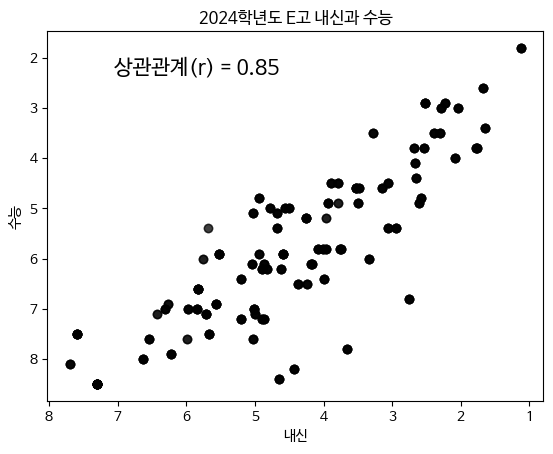

In [ ]:
#5. 내신과 수능과 상관관계A: 산포도

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Drop rows with any NaN values in '전과목' or '등급수능' columns
df = df.dropna(subset=['전과목', '등급수능'])


# Extract '전과목' and '등급수능' columns
x = df['전과목'].values
y = df['등급수능'].values


# Calculate the correlation coefficient
corr_coef = np.corrcoef(x, y)[0, 1]


# Create the scatter plot
plt.scatter(x, y, alpha=0.5,  c='black')
plt.title('2024학년도 E고 내신과 수능')
plt.xlabel('내신')
plt.ylabel('수능')

# Add the correlation coefficient to the plot
plt.text(0.3, 0.9, f'상관관계(r) = {corr_coef:.2f}',
         horizontalalignment='center', verticalalignment='center',
         transform=plt.gca().transAxes, fontsize=15)

# Reverse the x-axis and y-axis
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()


#그래프 저장
path = '/content/drive/MyDrive/python/eunpyeong/result_habbul/'
plt.savefig(f'{path}pass_2024_은평고_내신수능상관계수.png')
plt.savefig(f'{path}pass_2024_은평고_내신수능상관계수.pdf')

plt.show()

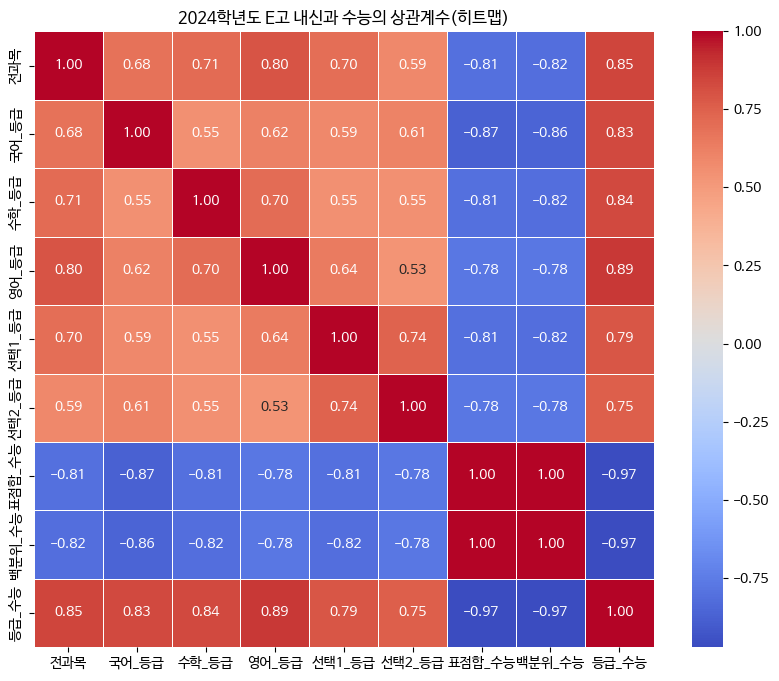

In [ ]:
#6. 내신과 수능과 상관관계B: 히트맵


import seaborn as sns

#일부 항목추출
df_heatmap = df[['전과목', '국어_등급', '수학_등급', '영어_등급', '선택1_등급', '선택2_등급', '표점합수능',  '백분위수능',  '등급수능']]


# 상관계수 계산
corr = df_heatmap.corr()


# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('2024학년도 E고 내신과 수능의 상관계수(히트맵)')

path = '/content/drive/MyDrive/python/eunpyeong/result_habbul/'
plt.savefig(f'{path}pass_2024_은평고_히트맵상관계수.png')
plt.savefig(f'{path}pass_2024_은평고_히트맵상관계수.pdf')

plt.show()

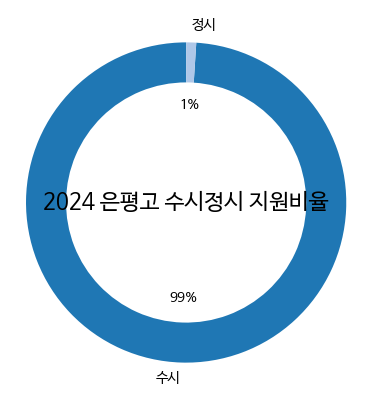

In [ ]:
#7.수시정시 지원률 그래프

import pandas as pd
import matplotlib.pyplot as plt


##  데이터 부르기
path = '/content/drive/MyDrive/python/habbul/'
df = pd.read_excel(f'{path}eunpyeong_2024_habbul.xlsx')



# 조건에 따라 '지원시기'열의 값 변경
df['지원시기'] = df['지원시기'].replace({'가': '정시', '나': '정시', '다': '정시', '정시1차':'정시',
                                       '수시1차': '수시', '수시2차': '수시', '수시': '수시'})


# '지원시기'별 비율 계산
지원시기_비율 = (df['지원시기'].value_counts(normalize=True) * 100).astype(int)  # 정수로 변환 후 퍼센트로 변환
labels = 지원시기_비율.index


# '최종' 열의 값이 '합'인 경우는 '합격', '불'인 경우는 '불합격'으로 변경
df['최종'] = df['최종'].apply(lambda x: '합격' if x == '합' else '불합격')


# '합격'과 '불합격'별 비율 계산
최종_비율 = (df['최종'].value_counts(normalize=True) * 100).astype(int)  # 정수로 변환 후 퍼센트로 변환


# '지원시기' 도넛 차트
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(지원시기_비율, labels=labels, autopct='%1.0f%%', startangle=90, colors=plt.cm.tab20.colors, wedgeprops=dict(width=0.25))




# 제목 추가
plt.text(0, 0, '2024 은평고 수시정시 지원비율', fontsize=16, ha='center', va='center')
plt.axis('equal')  # 동그랗게 만들기


path = '/content/drive/MyDrive/python/eunpyeong/result_habbul/'
plt.savefig(f'{path}pass_2024_은평고_수시정시지원비율.png')
plt.savefig(f'{path}pass_2024_은평고_수시정시지원비율.pdf')
plt.show()


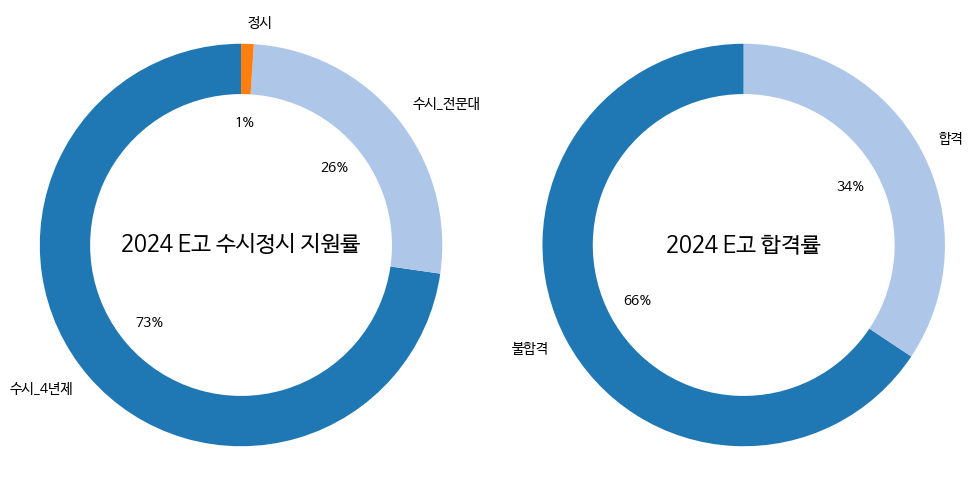

In [ ]:
#8. 수시 비중을 4년제와 전문대로 분리

import pandas as pd
import matplotlib.pyplot as plt



# 조건에 따라 '지원시기'열의 값 변경
df['지원시기'] = df['지원시기'].replace({'가': '정시', '나': '정시', '다': '정시', '정시1차':'정시',
                                       '수시1차': '수시_전문대', '수시2차': '수시_전문대', '수시': '수시_4년제'})


# '지원시기'별 비율 계산
지원시기_비율 = (df['지원시기'].value_counts(normalize=True) * 100).astype(int)  # 정수로 변환 후 퍼센트로 변환
labels = 지원시기_비율.index


# '최종' 열의 값이 '합'인 경우는 '합격', '불'인 경우는 '불합격'으로 변경
#df['최종'] = df['최종'].apply(lambda x: '합격' if x == '합' else '불합격')

# '최종' 열의 값을 '합격', '불합격'으로 직접 변경
df['최종'] = df['최종'].replace({'합': '합격', '불': '불합격'})


# '합격'과 '불합격'별 비율 계산
최종_비율 = (df['최종'].value_counts(normalize=True) * 100).astype(int)  # 정수로 변환 후 퍼센트로 변환


# '지원시기' 도넛 차트
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(지원시기_비율, labels=labels, autopct='%1.0f%%', startangle=90, colors=plt.cm.tab20.colors, wedgeprops=dict(width=0.25))
# 제목 추가
plt.text(0, 0, '2024 E고 수시정시 지원률', fontsize=16, ha='center', va='center')
plt.axis('equal')  # 동그랗게 만들기



# '합격'과 '불합격' 도넛 차트
plt.subplot(1, 2, 2)
plt.pie(최종_비율, labels=최종_비율.index, autopct='%1.0f%%', startangle=90, colors=plt.cm.tab20.colors, wedgeprops=dict(width=0.25))
plt.text(0, 0, '2024 E고 합격률', fontsize=16, ha='center', va='center')
plt.axis('equal')  # 동그랗게 만들기

plt.tight_layout()  # subplot 간 간격 조절


path = '/content/drive/MyDrive/python/eunpyeong/result_habbul/'
plt.savefig(f'{path}pass_2024_은평고_수시정시합격률.png')
plt.savefig(f'{path}pass_2024_은평고_수시정시합격률.pdf')
plt.show()

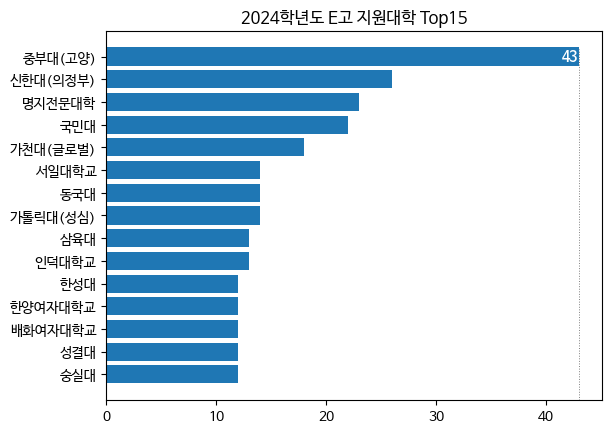

In [ ]:
#9. 선호대학: 가로 막대그래프

import pandas as pd
import matplotlib.pyplot as plt


# 데이터 불러오기
path = '/content/drive/MyDrive/python/habbul/'
df = pd.read_excel(f'{path}eunpyeong_2024_habbul.xlsx')

# Filter the rows based on the frequency of the "대학" column
freq = df['대학'].value_counts()
freq = freq[freq >= 12]

# 대학수
freq_num = len(freq)

# Create a horizontal bar plot with descending order
freq_sorted = freq.sort_values()
plt.barh(freq_sorted.index, freq_sorted)



# Draw a dotted vertical line only from the X-axis tick with maximum value of the plot
max_value = max(freq_sorted)
plt.axvline(max_value, linestyle=':', color='gray', linewidth=0.7, ymax=0.95)  # 아래쪽 x축까지 선이 도달하도록 ymax 설정



# Annotate the maximum value on the plot
plt.text(max_value - 1.5, len(freq_sorted) - 1, f'{max_value}', color='white', fontsize=10, va='center', fontweight='bold')



# Save the plot in png and pdf formats
path1 = '/content/drive/MyDrive/python/eunpyeong/result_habbul/'

plt.title(f"2024학년도 E고 지원대학 Top{freq_num}")
plt.savefig(f'{path1}2024uni_preferred.png', dpi=300, bbox_inches='tight')
plt.savefig(f'{path1}2024uni_preferred.pdf', bbox_inches='tight')
plt.show()

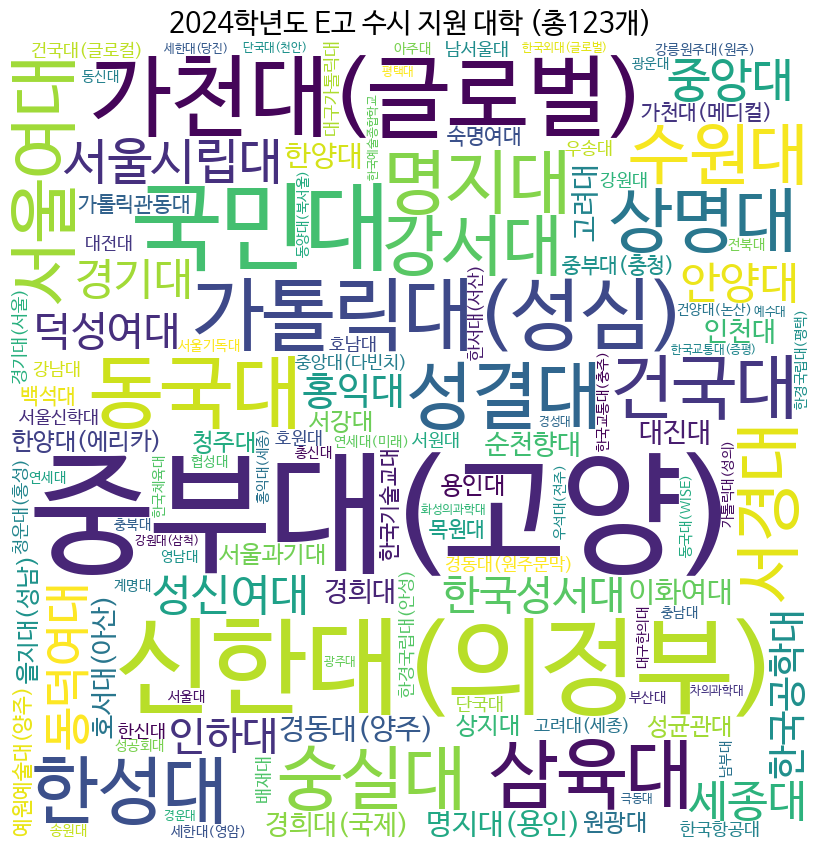

In [ ]:
#10.선호대학: 가로 막대그래프: 워드클라우드(wordcloud): 2023학년도 - 작년!

import random
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import datetime

# Get the current year
current_year = datetime.datetime.now().year


# Assuming the academic year starts this year and continues into the next year
academic_year = f"{current_year}학년도"


#지원시기: 수시
df_apply = df[df.지원시기  == '수시']



#중복제외한 대학수
df_dup = df_apply.drop_duplicates('대학')
df_freq = len(df_dup['대학'])



#결과를 하나로 고정
random.seed(42)  # set the random seed



wordcloud = WordCloud(font_path='NanumBarunGothic', width=800, height=800, background_color='white', min_font_size=10).generate_from_frequencies(df_apply['대학'].value_counts())


fig = plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)


# Now update the title string to include the current academic year
plt.title(f"{academic_year} E고 수시 지원 대학 (총{df_freq}개)", fontsize=20)

path = '/content/drive/MyDrive/python/eunpyeong/result_wordcloud/'
pdf_path = f'{path}2024학년도_은평고_wordcloud.pdf'
plt.savefig(pdf_path, dpi=300, bbox_inches='tight', pad_inches=0)

wordcloud.to_file(f'{path}2024학년도_은평고_wordcloud.png')

plt.show()

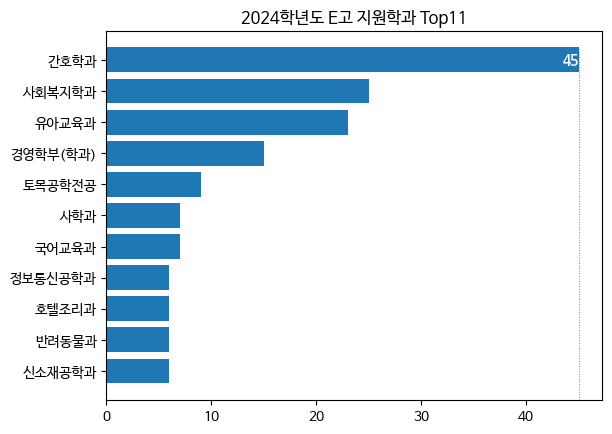

In [ ]:
#11. 선호학과 그래프

import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
path = '/content/drive/MyDrive/python/habbul/'
df = pd.read_excel(f'{path}eunpyeong_2024_habbul.xlsx')


# '모집단위' 열에서 '경영학과'와 '경영학부'를 '경영학부(학과)'로 합산
df['모집단위'] = df['모집단위'].replace({'경영학과': '경영학부(학과)', '경영학부': '경영학부(학과)'})


# Filter the rows based on the frequency of the "대학" column
freq = df['모집단위'].value_counts()
freq = freq[freq >= 6]

# 대학수
freq_num = len(freq)

# Create a horizontal bar plot with descending order
freq_sorted = freq.sort_values()
plt.barh(freq_sorted.index, freq_sorted)



# Draw a dotted vertical line only from the X-axis tick with maximum value of the plot
max_value = max(freq_sorted)
plt.axvline(max_value, linestyle=':', color='gray', linewidth=0.7, ymax=0.95)  # 아래쪽 x축까지 선이 도달하도록 ymax 설정



# Annotate the maximum value on the plot
plt.text(max_value - 1.5, len(freq_sorted) - 1, f'{max_value}', color='white', fontsize=10, va='center', fontweight='bold')



# Save the plot in png and pdf formats
path1 = '/content/drive/MyDrive/python/eunpyeong/result_habbul/'

plt.title(f"2024학년도 E고 지원학과 Top{freq_num}")
plt.savefig(f'{path1}2024haggwa_preferred.png', dpi=300, bbox_inches='tight')
plt.savefig(f'{path1}2024haggwa_preferred.pdf', bbox_inches='tight')
plt.show()

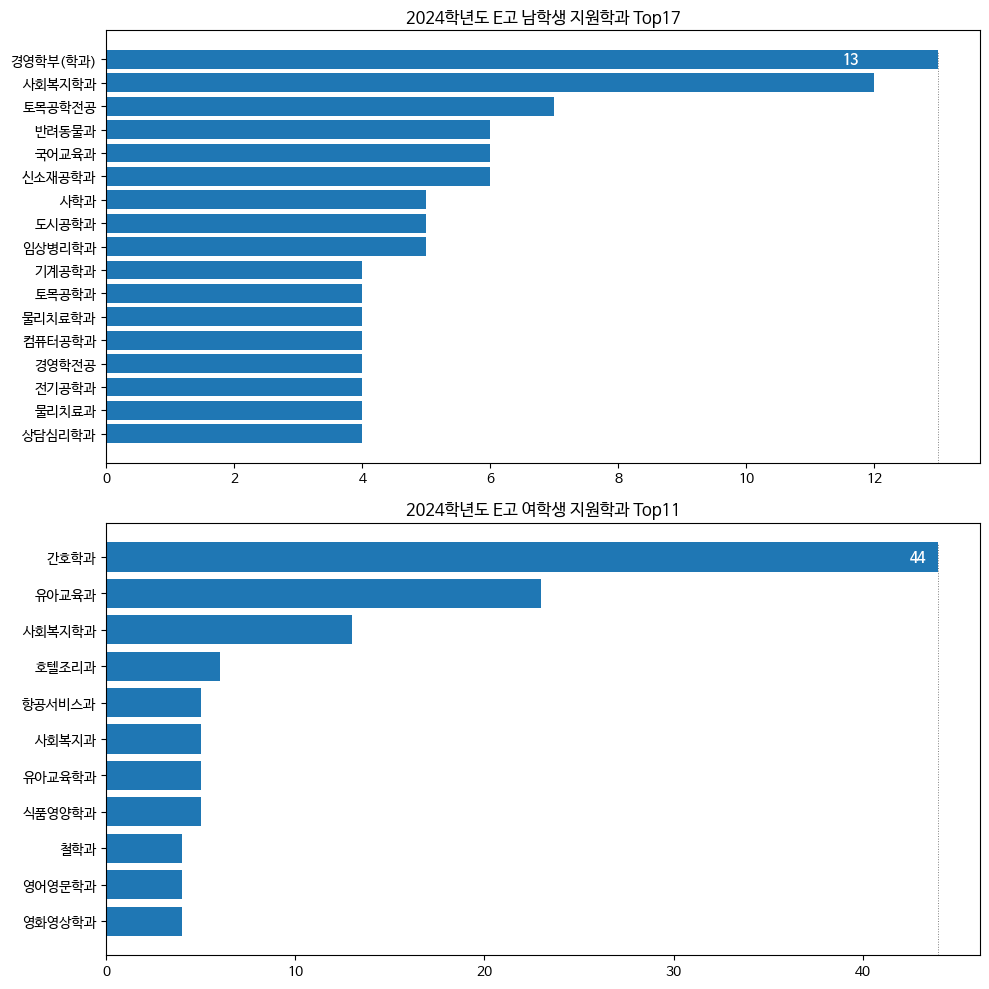

In [ ]:
#11-1 성별 지원학과

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# 데이터 불러오기
path = '/content/drive/MyDrive/python/habbul/'
df = pd.read_excel(f'{path}eunpyeong_2024_habbul.xlsx')

# '모집단위' 열에서 '경영학과'와 '경영학부'를 '경영학부(학과)'로 합산
df['모집단위'] = df['모집단위'].replace({'경영학과': '경영학부(학과)', '경영학부': '경영학부(학과)'})

# 새로운 열 '성별' 생성
df['성별'] = df['학번'].apply(lambda x: '여학생' if str(x).startswith(('301', '302', '303')) else '남학생')

# 현재 연도 가져오기
current_year = datetime.now().year

# 남성과 여성별로 각각 그래프 작성
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

for i, (gender, data) in enumerate(df.groupby('성별')):
    freq = data['모집단위'].value_counts()
    freq = freq[freq >= 4]
    freq_num = len(freq) #학과수
    freq_sorted = freq.sort_values()
    axes[i].barh(freq_sorted.index, freq_sorted)
    axes[i].set_title(f'{current_year}학년도 E고 {gender} 지원학과 Top{freq_num}')
    max_value = max(freq_sorted)
    axes[i].axvline(max_value, linestyle=':', color='gray', linewidth=0.7, ymax=0.95)
    axes[i].text(max_value - 1.5, len(freq_sorted) - 1, f'{max_value}', color='white', fontsize=10, va='center', fontweight='bold')

plt.tight_layout()


#저장
path1 = '/content/drive/MyDrive/python/eunpyeong/result_habbul/'
plt.savefig(f'{path1}2024선호학과_은평고_성별.png', dpi=300, bbox_inches='tight')
plt.savefig(f'{path1}2024선호학과_은평고_성별.pdf', bbox_inches='tight')

plt.show()

In [ ]:
#12. 반별 4년제 합격자 총명단: 리스트

from tabulate import tabulate

path = '/content/drive/MyDrive/python/habbul/'
df = pd.read_excel(f'{path}eunpyeong_2024_habbul.xlsx')


#지역, 최종, ace대학 제외
seoul_df = df[(df.최종 == '합') & ~(df.대학.str.contains("대학교"))]


#필요한 변수(열)만 불러옴
seoul_df = seoul_df[['지역', '학번', '계열', '이름', '대학', '모집단위', '최종', '전과목', '지원시기', '전형분류']]



# tabulate를 사용하여 결과 출력
print(tabulate(seoul_df, headers='keys', tablefmt='plain', showindex=False))
print("********************************************************************")



#합격자수
print("2024학년도  E고 대학 합격자수는 %d건입니다.(중복합격 포함)" % len(seoul_df))


#데이터 프레임으로 전환
seoul_df_p = pd.DataFrame(seoul_df)


#결과를 엑셀로 저장
path = '/content/drive/MyDrive/python/eunpyeong/result_habbul/'
seoul_df_p.to_excel(excel_writer= f'{path}반별합격자명단_2024_은평고.xlsx')

In [ ]:
#13. 4년제대 합격자 명단A - 선호대학 순으로 출력

import pandas as pd
from tabulate import tabulate



# 지역, 최종, ace대학 제외
uni4 = df[(df.최종 == '합') & ~(df.대학.str.contains("대학교"))]

# 필요한 변수(열)만 불러옴
uni4 = uni4[['지역', '이름', '대학', '모집단위', '최종', '전과목', '지원시기', '전형분류', '표점합수능', '백분위수능']]


uni4['전과목'] = uni4['전과목'].round(2)

# NaN 값을 '졸업생'으로 변경
uni4['전과목'].fillna('졸업생', inplace=True)


#대구카톨릭대 국어교육과 합격자 제외
uni4 = uni4[~((uni4['대학'] == '대구가톨릭대') & (uni4['모집단위'] == '국어교육과'))].copy()


# 결과를 출력할 순서대로 정렬
output_order = ['대구가톨릭대', '서울대', '연세대', '고려대', '서강대', '성균관대', '한양대', '중앙대', '경희대', '한국외대', '서울시립대', '이화여대', '건국대', '동국대', '홍익대', '숙명여대',
                '국민대', '숭실대', '세종대', '서울과기대', '광운대', '명지대', '상명대', '가톨릭대(성심)', '동덕여대', '가천대(글로벌)', '한국예술종합학교', '공군사관학교', '한성대', '서경대', '삼육대',  '성신여대', '서울여대', '덕성여대', '아주대', '인하대', '한양대(에리카)']

uni4 = uni4.sort_values(by=['대학', '모집단위'], key=lambda x: x.map({v: i for i, v in enumerate(output_order)}))

# tabulate를 사용하여 결과 출력
print(tabulate(uni4, headers='keys', tablefmt='plain', showindex=False))
print("********************************************************************")

# 합격자수
print("2024학년도 은평고 대학 합격자수는 %d건입니다.(중복합격 포함)" % len(uni4))

# 데이터 프레임으로 전환
uni4_p = pd.DataFrame(uni4)

# 결과를 엑셀로 저장
path = '/content/drive/MyDrive/python/eunpyeong/result_habbul/'
uni4_p.to_excel(excel_writer=f'{path}선호대학순_2024_은평고_uniorder.xlsx')

In [ ]:
#14. 게시용 익명


from tabulate import tabulate

# 지역, 최종, ace대학 제외
uni4 = df[(df.최종 == '합') & ~(df.대학.str.contains("대학교"))]

# 필요한 변수(열)만 불러옴
uni4 = uni4[['이름', '지역', '대학', '모집단위', '최종', '전과목', '전형분류', '전형명', '전형방법']]

uni4['전과목'] = uni4['전과목'].round(2)


# Show first one letter and replace the rest of the letters with an asterisk in '이름' column
uni4['이름'] = uni4['이름'].apply(lambda x: x[:1] + '*' * (len(x) - 1) if len(x) >= 2 else x)

# 대구카톨릭대 국어교육과 합격자 제외
uni4 = uni4[~((uni4['대학'] == '대구가톨릭대') & (uni4['모집단위'] == '국어교육과'))].copy()

# 결과를 출력할 순서대로 정렬
output_order = ['대구가톨릭대', '서울대', '연세대', '고려대', '서강대', '성균관대', '한양대', '중앙대', '경희대', '한국외대', '서울시립대', '이화여대', '건국대', '동국대', '홍익대', '숙명여대',
                '국민대', '숭실대', '세종대', '서울과기대', '광운대', '명지대', '상명대', '가톨릭대(성심)', '가천대(글로벌)', '동덕여대', '한성대', '서경대', '삼육대',  '성신여대', '서울여대', '덕성여대', '아주대', '인하대', '한양대(에리카)']



#uni4 = uni4.sort_values(by=['대학', '모집단위'], key=lambda x: x.map({v: i for i, v in enumerate(output_order)}))
uni4 = uni4.sort_values(by=['대학'], key=lambda x: x.map({v: i for i, v in enumerate(output_order)}))


# tabulate를 사용하여 결과 출력
print(tabulate(uni4, headers='keys', tablefmt='plain', showindex=False))
print("********************************************************************")

# 합격자수
print("2024학년도 은평고 대학 합격자수는 %d건입니다.(중복포함)" % len(uni4))

# 데이터 프레임으로 전환
uni4_p = pd.DataFrame(uni4)

# 결과를 엑셀로 저장
path = '/content/drive/MyDrive/python/eunpyeong/result_habbul/'
uni4_p.to_excel(excel_writer=f'{path}합격자익명_2024_은평고_uniorder_anonymous.xlsx')


## 첫글자는 남기고 나머지 글자는 별표표시

uni4['이름'] = uni4['이름'].apply(lambda x: x[:1] + '*' * (len(x) - 1) if len(x) >= 2 else x)

이 코드는 데이터프레임의 '이름' 열에 있는 각각의 값을 수정하는데 사용됩니다. 여기서는 lambda 함수를 사용하여 각 이름을 변경하고 있습니다.

설명을 간단히 하면:

1. uni4['이름'].apply()는 '이름' 열의 각 항목에 함수를 적용하는 메서드입니다.

2. lambda x: x[:1] + '*' * (len(x) - 1) if len(x) >= 2 else x 부분은 람다 함수입니다. 이 함수는 이름의 길이가 2 이상인 경우에만 실행됩니다.

3. x[:1]은 이름의 첫 번째 글자를 가져옵니다.

4. ' * ' * (len(x) - 1)은 첫 번째 글자를 제외한 나머지 글자를 '*'로 바꿉니다. 글자의 길이에서 1을 빼는 이유는 첫 번째 글자는 그대로 두기 위해서입니다.

5. if len(x) >= 2 else x는 이름이 두 글자 이상일 때만 위의 작업을 수행하고, 그렇지 않으면 이름을 그대로 반환합니다.

In [ ]:
#15. 게시용 4년제대 합격자 명단A: '지역', '대학', '모집단위', '지원시기'


import pandas as pd
from tabulate import tabulate

# 최종 열의 값이 '가나다'일 때 '정시'로 변경
df.loc[df['최종'] == '가나다', '최종'] = '정시'

# 게시용 4년제대 합격자 명단A: '지역', '대학', '모집단위', '지원시기'

# uni4 DataFrame 생성
uni4 = df[(df['최종'] == '합') & ~(df['대학'].str.contains("대학교"))][['지역', '대학', '모집단위', '지원시기']]


# '지원시기' 열의 값이 '가', '나', '다'일 경우 '정시'로 변경
uni4.loc[uni4['지원시기'].isin(['가', '나', '다']), '지원시기'] = '정시'



#대구카톨릭대 국어교육과 합격자 제외
uni4 = uni4[~((uni4['대학'] == '대구가톨릭대') & (uni4['모집단위'] == '국어교육과'))].copy()


# 결과를 출력할 순서대로 정렬
output_order = ['대구가톨릭대', '서울대',  '연세대', '고려대', '서강대', '성균관대', '한양대', '중앙대', '경희대', '한국외대', '서울시립대', '이화여대', '건국대', '동국대', '홍익대', '숙명여대',
                '국민대', '숭실대', '세종대', '서울과기대', '광운대', '명지대', '상명대', '가톨릭대(성심)', '가천대(글로벌)',
                '한국예술종합학교', '공군사관학교', '한성대', '서경대', '삼육대',  '성신여대', '서울여대', '덕성여대', '아주대', '인하대', '한양대(에리카)']



uni4 = uni4.sort_values(by=['대학', '모집단위'], key=lambda x: x.map({v: i for i, v in enumerate(output_order)}))

# 합격자수
print("2024 E고 4년제대 합격자수는 %d건입니다.(중복합격 포함)" % len(uni4))
print("***************************************************************************")

# tabulate를 사용하여 결과 출력
print(tabulate(uni4, headers='keys', tablefmt='plain', showindex=False))

# 데이터프레임을 엑셀로 저장
path = '/content/drive/MyDrive/python/eunpyeong/result_habbul/'
uni4.to_excel(excel_writer=f'{path}게시용합격자_2024_은평고_uniorder_board1.xlsx', index=False)


In [ ]:
#16. 게시용 4년제대 합격자 명단B: '지역', '대학', '모집단위', '지원시기', '전형분류'

from tabulate import tabulate


# 지역, 최종, ace대학 제외
uni4 = df[(df.최종 == '합') & ~(df.대학.str.contains("대학교"))]



# '지원시기' 열의 값이 '가', '나', '다'일 경우 '정시'로 변경
uni4.loc[uni4['지원시기'].isin(['가', '나', '다']), '지원시기'] = '정시'


# 필요한 변수(열)만 불러옴
uni4 = uni4[['지역', '대학', '모집단위', '지원시기', '전형분류']]



#대구카톨릭대 국어교육과 합격자 제외
uni4 = uni4[~((uni4['대학'] == '대구가톨릭대') & (uni4['모집단위'] == '국어교육과'))].copy()



# 결과를 출력할 순서대로 정렬
output_order = ['대구가톨릭대', '서울대',  '연세대', '고려대', '서강대', '성균관대', '한양대', '중앙대', '경희대', '한국외대', '서울시립대', '이화여대', '건국대', '동국대', '홍익대', '숙명여대',
                '국민대', '숭실대', '세종대', '서울과기대', '광운대', '명지대', '상명대', '가톨릭대(성심)', '가천대(글로벌)',
                '한국예술종합학교', '공군사관학교', '한성대', '서경대', '삼육대',  '성신여대', '서울여대', '덕성여대', '아주대', '인하대', '한양대(에리카)']


uni4 = uni4.sort_values(by=['대학', '모집단위'], key=lambda x: x.map({v: i for i, v in enumerate(output_order)}))



# 합격자수
print("2024 E고 4년제대 합격자수는 %d건입니다.(중복합격 포함)" % len(uni4))
print("**********************************************************************")


# tabulate를 사용하여 결과 출력
print(tabulate(uni4, headers='keys', tablefmt='plain', showindex=False))


# 데이터 프레임으로 전환
uni4_p = pd.DataFrame(uni4)

# 결과를 엑셀로 저장
path = '/content/drive/MyDrive/python/eunpyeong/result_habbul/'
uni4_p.to_excel(excel_writer=f'{path}pass_2024_은평고_uniorder_board2.xlsx')

In [ ]:
#17. 지원횟수가 궁금한 대학

import pandas as pd

## 데이터 불러오기
path = '/content/drive/MyDrive/python/habbul/'
df = pd.read_excel(f'{path}eunpyeong_2024_habbul.xlsx')

uni = input("지원횟수가 궁금한 대학: ")

# 대학명에 입력한 문자열이 포함된 행들을 찾기
df_uni = df[df['대학'].str.contains(uni, regex=False)]
df_uni = df_uni[['이름', '대학', '모집단위', '최종', '전과목', '전형분류']]


#전과목 열의 값을 소수점 둘째 자리에서 반올림하기
df_uni['전과목'] = df_uni['전과목'].round(1)


#지원건수 세기
df_uni_len = len(df_uni)


# Convert DataFrame to a list of lists for tabulate
table_data = df_uni.values.tolist()


# Define the table headers
table_headers = ['이름', '대학', '모집단위', '최종', '전과목', '전형분류']


# Create the formatted table using tabulate
table_string = tabulate(table_data, headers=table_headers, tablefmt='plain')


print(f'{uni}에 지원한 횟수는 {df_uni_len}회')
print('----------------------------------------')
print(f'{uni} 지원명단')
print(table_string)
#print(df_uni)

In [ ]:
#18. 특정 백분위 구간의 점수별 빈도(ex: 80~85%사이의 빈도수)

mi = int(input("이상:"))
mx = int(input("미만:"))


# mx이상 mi이하 조건을 충족하는 객체 만들기
df_interval = df[(df.백분위수능 >= mi) & (df.백분위수능 < mx)]

#중복학생을 제외하고 1개만 남김
df_interval = df_interval.drop_duplicates('이름')

df_interval_name = df_interval[['학번', '이름', '전과목', '등급수능', '백분위수능']].copy()


#전과목 열을 소숫점 둘째자리까지만 표시
df_interval_name['백분위수능'] = df_interval_name['백분위수능'].round(1)


#전과목 열을 소숫점 둘째자리까지만 표시
df_interval_name['전과목'] = df_interval_name['전과목'].round(2)


#결과를 백분위수능순으로 내림차순
df_interval_name = df_interval_name.sort_values(by='백분위수능', ascending=False)


# Define the table headers
table_headers = ['학번', '이름', '전과목', '등급수능', '백분위수능']


# Create the formatted table using tabulate
table_string = tabulate(df_interval_name, headers=table_headers, tablefmt='plain')
print(table_string)
print()


print("--------------------------------------------")
#print(str(len(list_1))+"명")

print(f"백분위 {mi}%이상 {mx}% 미만 :{len(df_interval)}명")
#자료 https://stackoverflow.com/questions/43855474/changing-sort-in-value-counts8

In [41]:
#19. 수시 전체건수/중복제거인원 = 1인당 지원횟수

df_susi = df[df['지원시기'] == '수시']
df_drop = df_susi.drop_duplicates('이름')
df_drop = len(df_drop)
df_apply = len(df_susi)

df_cal = round(df_apply / df_drop, 1)

print(f'수시 지원건수: {df_apply}회')
print(f'수시 지원자수  {df_drop}명')

print(f'수시 평균 지원건수는 {df_cal}회이다.')

수시 지원건수: 559회
수시 지원자수  108명
수시 평균 지원건수는 5.2회이다.


In [ ]:
#20. 이름으로 학생의 내신과 석차를 확인: 아름다운 코드 A

# Get input name
name = input("이름:")

# Filter DataFrame to only include rows with the input name
df_filtered = df[df['이름'] == name]

# 학생의 내신
df_filtered_nesin = df_filtered['전과목'].iloc[0].round(1)


# Calculate rank
# 해당 학생보다 내신 성적이 낮은 학생들의 수
lower_scores = df[df['전과목'] < df_filtered_nesin]['이름'].nunique()

# 동일한 내신 성적을 가진 학생들의 수
equal_scores = df[df['전과목'] == df_filtered_nesin]['이름'].nunique() - 1

# 최종 석차 계산
rank = lower_scores + equal_scores + 1

# Print the result
print("********************************************")
print(f"{name}의 내신은 {df_filtered_nesin}등급이고 석차는 {rank}등입니다.")


In [85]:
#21. 특정 수능 백분위점수 구간의 내신과 수능백분위와의 상관관계

import pandas as pd
import numpy as np
from scipy.stats import pearsonr


#특정 백분위 구간의 점수별 빈도(ex: 80~85%사이의 빈도수)
mi = int(input("이상:"))
mx = int(input("미만:"))


# mx이상 mi이하 조건을 충족하는 객체 만들기
df_interval = df[(df.백분위수능 >= mi) & (df.백분위수능 < mx)]

#중복학생을 제외하고 1개만 남김
#df_interval = df_interval.drop_duplicates('이름')

df_interval_name = df_interval[['학번', '이름', '백분위수능', '전과목']].copy()


# 상관계수 및 p-값 계산
corr, p_value = pearsonr(df_interval_name['전과목'], df_interval_name['백분위수능'])
r_squared = corr ** 2

# 결과 출력
print(f"상관계수: {corr:.2f}")
print(f"p-값: {p_value:.2f}")
print(f"설명력: {r_squared:.2f}")

이상:60
미만:77
상관계수: 0.19
p-값: 0.14
설명력: 0.04


In [34]:
#중복뺀 수시지원 인원: 108명
df_susi = df[df['지원시기'] == '수시']
df_drop = df_susi.drop_duplicates('이름')
df_drop = len(df_drop)

print(df_drop)

108


In [ ]:
#E고 전체 합격자: 중복 합격포함 : 134건
df_pass = df[df.최종 == '합']
print(df_pass.count())

#수시, 정시별 합격건수: 수시(123건), 정시(11건)
#df_pass.groupby(['지원시기']).count()

In [ ]:
#중복합격자 제외
df_pass['학번'].unique()

#중복합격자수 제외한 합격자수: 71명
df_pass['학번'].nunique()

In [ ]:
#이름으로 백분위 점수 조회
name = input("이름:")
df_name = df[(df.이름 == name)]
df_name = df_name[['학번', '이름', '대학',  '모집단위', '최종', '전형분류', '전과목', '표점합수능', '백분위수능', '전형명', '전형분류', '전형명', '전형방법']]

df_name['전과목'] = df_name['전과목'].round(1)
df_name

In [ ]:
#반 입력해서 해당반 학생들 출력하기 ex)302
num = input("학년반 ex)301: ")
df_num = df[df['학번'].astype(str).str.contains(num)]
df_num = df_num[['학번', '이름', '대학', '모집단위', '전과목', '백분위수능']]
df_num

# 이름을 입력하여 내신기준 석차를 출력하는 코드 설명

1)* df[df['전과목'] < df_filtered['전과목'].iloc[0]]* selects rows from the DataFrame where the "전과목" value is lower than the "전과목" value of the student whose name was input by the user. This creates a filtered DataFrame that includes all students who have a lower "전과목" value than the input student.


2) *.groupby('이름')['전과목']* groups the filtered DataFrame by the "이름" column and selects the "전과목" column. This creates a Series object that contains the "전과목" values of all the students who have a higher "전과목" value than the input student, grouped by name.


3) *.nunique()* counts the number of unique "전과목" values in the grouped Series. This effectively counts the number of students who have a higher "전과목" value than the input student, excluding any duplicates.

4) *.sum()* adds up the counts of unique "전과목" values for all the groups. This gives the total number of students who have a higher "전과목" value than the input student, excluding duplicates.

5)* + 1* adds 1 to the total count to get the rank of the input student, since the rank is equal to the number of students with a higher "전과목" value plus 1.

6) Finally, the rank is assigned to the rank variable and returned as the output of the program.

In [ ]:
#이름으로 해당 학생의 전체 석차를 확인: 아름다운 코드 B - 단순한 코드

# Get input name
name = input("이름:")

# Filter DataFrame to only include rows with the input name
df_filtered = df[df['이름'] == name]

# Calculate rank of first row in filtered DataFrame
rank = df[df.전과목 < df_filtered.전과목.iloc[0]]
rank = rank.groupby('이름')['전과목'].nunique().sum() + 1

# Print the result
print(f"{name}의 '전과목' 등수는 {rank}등 입니다.")


In [ ]:
df_sort = df['전과목'].sort_values()
print(df_sort)

In [ ]:
# 대학으로 과목별 등급과 등급_평균 조회
name = input("대학:")
df_name = df[df['대학'].str.contains(name, na=False) & (df['최종'] == '합')]
df_name = df_name[['학번', '이름', '대학',  '모집단위', '최종', '전형명', '전형분류','전과목', '백분위수능', '표점합수능', '전형방법']]
df_name

In [ ]:
#학번으로 백분위 점수 조회
code = int(input("학번:"))
df_code = df[(df.학번 == code)]
df_code = df_code[['학번', '이름', '대학',  '모집단위', '최종', ]]
df_code

In [98]:
#영어등급대 인원

mi = int(input("영어 수능등급:"))
df_interval = df[(df.영어_등급 == mi)]
df_interval[['학번', '영어_등급']]

df_interval_unique = df_interval['학번'].unique().size
print("영어 수능등급 {}명".format(df_interval_unique))

영어 수능등급:1
영어 수능등급 1명


수능의 이론적 평균
1. 백분위 : 50%
2. 표준점수: 300점 - 국어(100) + 수학(100) + 탐구1(50) + 탐구2(50)
3. 수능등급: 5등급 - 9등급 중 중간값(median)

In [ ]:
# E고 작년 고3 수능 백분위 평균: 2022 고3: ?, 2023 고3: 34%


# '학번' 열에서 '380'이 들어있지 않은 행 추출: 재수생들 제외
df_filtered = df[~df['학번'].astype(str).str.contains('380')]


df_standard = df_filtered.dropna(subset = ['백분위수능'])


s_mean = df_standard['백분위수능'].mean().round(0)
print(f"2024학년도 E고 수능 백분위점수는 {int(s_mean)}%입니다.")  # 소수점 첫째 자리에서 반올림

2024학년도 E고 수능 백분위점수 평균은 34%입니다.


In [7]:
# E고 작년 고3 수능 등급평균: 2023 고3: 34%


# '학번' 열에서 '380'이 들어있지 않은 행 추출: 재수생들 제외
df_filtered = df[~df['학번'].astype(str).str.contains('380')]


df_standard = df_filtered.dropna(subset = ['등급수능'])


s_mean = df_standard['등급수능'].mean().round(1)
print(f"2024학년도 E고 수능 등급은 {(s_mean)}입니다.")

2024학년도 E고 수능 등급은 5.8입니다.


In [ ]:
# '국어_표준점수', '수학_표준점수', '선택1_표준점수', '선택2_표준점수'의 열의 값이 모두 1이상인 행의 값을 합산

total_standard_scores = df_filtered[(df_filtered['국어_표준점수'] >= 1) &
                                    (df_filtered['수학_표준점수'] >= 1) &
                                    (df_filtered['선택1_표준점수'] >= 1) &
                                    (df_filtered['선택2_표준점수'] >= 1)].sum(numeric_only=True)

# '표점합수능' 열의 유효값들의 합산을 해당 빈도로 나누어 평균계산
valid_scores_count = df_standard['표점합수능'].count()
total_valid_scores = df_standard['표점합수능'].sum()
average_score = total_valid_scores / valid_scores_count

# 결과 출력
print(f"2024학년도 E고 수능 표점합점수는 {average_score:.0f}점입니다.")

2024학년도 E고 수능 표점합점수는 194점입니다.


In [ ]:
#2022 고3 수능점수와 2023 고3 수능점수 막대 그래프

import matplotlib.pyplot as plt

# '학번' 열에서 '380'이 들어있지 않은 행 추출: 재수생들 제외
df_filtered = df[~df['학번'].astype(str).str.contains('380')]


# 필터링된 행에서 백분위수능 열의 결측값을 제외하고 평균 계산하여 반올림한 후 정수로 변환
current_mean = round(df_filtered['백분위수능'].dropna().mean())

# 2023년도 백분위와 2024년도 백분위 데이터
years = ['2023학년도', '2024학년도']
percentiles = [44, current_mean]

# 그래프 그리기
plt.figure(figsize=(8, 6))
plt.bar(years, percentiles, color=['blue', 'green'], width=0.2)

# 그래프 제목과 축 레이블 설정
plt.title('E고 2년간의 수능 백분위 점수', fontsize=16)
plt.xlabel('연도', fontsize=14)
plt.ylabel('백분위', fontsize=14)

# 그래프에 백분위 값 표시
for i in range(len(years)):
    plt.text(x=years[i], y=percentiles[i] + 0.5, s=f"{percentiles[i]}%", ha='center')

# 화살표 추가
plt.annotate('', xy=(0.8, 49), xytext=(0.2, 43), arrowprops=dict(facecolor='black', arrowstyle='->'))

path = '/content/drive/MyDrive/python/eunpyeong/result_habbul/'
plt.savefig(f'{path}pass_2024_은평고_2년치수능백분위.png')
plt.savefig(f'{path}pass_2024_은평고_2년치수능백분위.pdf')

# 그래프 출력
plt.tight_layout()
plt.show()


In [ ]:
name = input("이름의 일부:")
df_pname = df['이름'].str.contains(name)
df_pname_sub = df[df_pname]
df_pname_sub[['학번', '이름', '대학', '모집단위',  '최종', '전과목', '백분위수능', '표점합수능', '모집인원', '전형분류', '전형종류']]

In [ ]:
#E고 내신 4등급 이하 학생 중 수능이 내신보다 더 잘 나온 학생 비율
# Filter the DataFrame
filtered_df = df[ (df['전과목'] <= 4) & (df['전과목'] > df[])]
filtered_df = filtered_df.drop_duplicates(subset='이름')

# Print the filtered DataFrame
print(filtered_df[['이름', '전과목', ]])

In [ ]:
#E고 내신 X등급 이하 학생 중 수능이 내신보다 더 잘 나온 학생 비율

nesin = int(input("내신이 X등급 이하 학생 중 수능이 내신보다 잘 나오는 학생 출력, 기준이 되는 등급을 입력: "))

# Filter the DataFrame
filtered_df = df[ (df['전과목'] <= nesin) & (df['전과목'] > df[])]
filtered_df = filtered_df.drop_duplicates(subset='이름')

#전과목을 소수점 둘째자리에 반올림
filtered_df['전과목'] = filtered_df['전과목'].round(1)


# Print the filtered DataFrame
print(filtered_df[['이름', '전과목', ]])

In [ ]:
#수능이 내신보다 더 잘 나오는 학생

# Filter the DataFrame
filtered_df = df[df['전과목'] > df[]]
filtered_df = filtered_df.drop_duplicates(subset='이름')


# Round the '전과목' column to two decimal places
filtered_df['전과목'] = filtered_df['전과목'].apply(lambda x: round(x, 1))

filtered_df_total = df.drop_duplicates(subset='이름')
filtered_df_num = len(filtered_df_total)
filtered_df_num_div = (len(filtered_df) / filtered_df_num)*100
filtered_df_num_div = round(filtered_df_num_div, 0)


# Print the filtered DataFrame
print(filtered_df[['이름', '전과목', ]])
print("-----------------------------------------------------")
print(f'E고 2024학년도 고3의 수능이 내신보다 높게 나온 학생 {len(filtered_df)}명이고 비율은 {int(filtered_df_num_div)}%입니다.')

In [ ]:
#내신 3등급이상 중 수능에서 1등급 이상 상승한 학생

# Filter the DataFrame
filtered_df = df[((df['전과목'] - df[]) >= 1) & (df['전과목'] < 4 )]
filtered_df = filtered_df.drop_duplicates(subset='이름')

# Round the '전과목' column to one decimal place
filtered_df['전과목'] = filtered_df['전과목'].apply(lambda x: round(x, 1))

filtered_df_total = df.drop_duplicates(subset='이름')
filtered_df_num = len(filtered_df_total)
filtered_df_num_div = (len(filtered_df) / filtered_df_num) * 100
filtered_df_num_div = round(filtered_df_num_div, 1)

# Print the filtered DataFrame
print(filtered_df[['이름', '전과목', ]])
print("-----------------------------------------------------")
print('E고 2024학년도 수능등급이 내신등급보다 1등급 이상 높게 나온 학생 {}명이고 비율은 {}%입니다.'.format(len(filtered_df), filtered_df_num_div))

In [ ]:
#수능에서 내신보다 1등급 이상 오른 학생

# Filter the DataFrame
filtered_df = df[(df['전과목'] - df[]) >= 1]
filtered_df = filtered_df.drop_duplicates(subset='이름')

# Round the '전과목' column to one decimal place
filtered_df['전과목'] = filtered_df['전과목'].apply(lambda x: round(x, 1))

#중복 제외 전체학생수, 중복제외 1등급 이상 오른 학생
filtered_df_total = df.drop_duplicates(subset='이름')
filtered_df_num = len(filtered_df_total)
filtered_df_num_div = (len(filtered_df) / filtered_df_num) * 100
filtered_df_num_div = round(filtered_df_num_div, 1)

# Add the condition column to the filtered DataFrame
filtered_df['향상도'] = (filtered_df['전과목'] - filtered_df[])

# Print the filtered DataFrame
print(filtered_df[['이름', '전과목', '향상도']])
print("-----------------------------------------------------")
print('E고 2024학년도 수능등급이 내신등급보다 1등급 이상 높게 나온 학생 {}명이고 비율은 {}%입니다.'.format(len(filtered_df), filtered_df_num_div))


***2024학년도 E고 합격건수***
서울대 0건
연세대 0건
고려대 0건
서강대 0건
성균관대 0건
한양대 0건
중앙대 2건
경희대 0건
한국외대 0건
서울시립대 0건
이화여대 1건
건국대 1건
동국대 2건
홍익대 0건

총 합격자 수: 6 건


In [ ]:
#학생별로 16개 대학 지원결과

import os
import pandas as pd



##  데이터 부르기
path = '/content/drive/MyDrive/python/habbul/'
df = pd.read_excel(f'{path}eunpyeong_2024_habbul.xlsx')


#대학리스트
uni = ['서울대', '연세대', '고려대', '서강대', '성균관대', '한양대', '중앙대', '경희대', '한국외대', '서울시립대', '이화여대', '건국대', '동국대', '홍익대']



# 서울 주요대학 수시합격자수 출력
print("\n***2024학년도 E고 서울16개대 합격횟수***")


# '이름'별 '최종' 열의 합 계산
df['합격건수'] = df.groupby('이름')['최종'].transform('sum')


# 중복 제거
df_unique = df.drop_duplicates(subset=['이름', '합격건수'])


# 결과 출력
for u in uni:
    df_u = df_unique[df_unique.대학 == u]
    if not df_u.empty:
        print(df_u[['이름', '합격건수']].to_string(index=False))
        print("---------------------------")


In [ ]:
#대학별 합불 보여주기

import pandas as pd

uni = ['서울대', '연세대', '고려대', '서강대', '성균관대', '한양대', '중앙대', '경희대', '한국외대', '서울시립대', '이화여대', '건국대', '동국대', '홍익대']

# 데이터 로드 부분은 생략됨

print("\n***2024학년도 E고 서울16개대 합격횟수***")

# '이름'별 '최종' 열의 합 계산
df['합격건수'] = df.groupby('이름')['최종'].transform('sum')

# '수능'이 포함된 행을 제외한 데이터프레임 생성
df_no_suneung = df[~df['전형분류'].str.contains('수능')]

# 중복 제거된 데이터프레임 생성
df_unique = df_no_suneung.drop_duplicates(subset=['이름'])

# 결과 출력
for u in uni:
    df_u = df_unique[df_unique.대학 == u]
    if not df_u.empty:
        print(f"{u} 합격자 명단:")
        print(df_u[['이름', '합격건수']].to_string(index=False))
        print("---------------------------")


In [ ]:
#학생- 지원대학, 학과 보여주기

import os
import pandas as pd

uni = ['서울대', '연세대', '고려대', '서강대', '성균관대', '한양대', '중앙대', '경희대', '한국외대', '서울시립대', '이화여대', '건국대', '동국대', '홍익대']

# 서울 주요대학 수시합격자수 출력
print("\n***2024학년도 E고 합격건수***")

# 'uni' 리스트에 해당하는 대학에 지원한 학생들만 필터링
df_filtered = df[df['대학'].isin(uni)]

# '이름'별로 '최종' 열의 합계 계산 ('합'이라는 값이 있으면 1로 계산)
df_filtered['합격건수'] = df_filtered['최종'].apply(lambda x: 1 if x == '합' else 0)
df_filtered['합격건수'] = df_filtered.groupby('이름')['합격건수'].transform('sum')

# 중복 제거
df_unique = df_filtered.drop_duplicates(subset=['이름'])

# 학생별로 결과 출력
for index, row in df_unique.iterrows():
    print(f"\n학생 이름: {row['이름']}, 합격건수: {row['합격건수']}")
    print()
    df_student = df_filtered[df_filtered['이름'] == row['이름']]
    print(df_student[['대학', '모집단위', '최종', '전과목', '전형분류']].to_string(index=False))
    print()
    print("------------------------------------------------------------------")

In [ ]:
#학생별 합격건수 및 지원대학을 보여주기
import os
import pandas as pd

uni = ['서울대', '연세대', '고려대', '서강대', '성균관대', '한양대', '중앙대', '경희대', '한국외대', '서울시립대', '이화여대', '건국대', '동국대', '홍익대']

# 서울 주요대학 수시합격자수 출력
print("\n***2024학년도 E고 합격건수***")

# '이름'별로 '최종' 열의 합계 계산 ('합'이라는 값이 있으면 1로 계산)
df['합격건수'] = df['최종'].apply(lambda x: 1 if x == '합' else 0)
df['합격건수'] = df.groupby('이름')['합격건수'].transform('sum')

# 중복 제거
df_unique = df.drop_duplicates(subset=['이름'])

# 학생별로 결과 출력
for index, row in df_unique.iterrows():
    print(f"\n학생 이름: {row['이름']}, 합격건수: {row['합격건수']}")
    df_student = df[df['이름'] == row['이름']]
    print(df_student[['대학', '모집단위', '최종']].to_string(index=False))


In [ ]:
#df_susi = df[df['지원시기'] == '수시']
df_english1_ratio = (df['영어_등급'] == 1.0).sum() / len(df['영어_등급'])*100
df_english1_ratio_int = int(df_english1_ratio.round(0))
print(f'영어1등급 {df_english1_ratio_int}%')

영어1등급 1%


In [ ]:
#수시 영어1등급 학생명단 및 학생수 출력

#라이브러리 불러오기
from tabulate import tabulate

#수시
df_susi = df[df['지원시기'] == '수시']

#1등급 filter
df_susi_english1 = df_susi[df_susi['영어_등급'] == 1.0]


#이름 중복자 제외
df_susi_english1 = df_susi_english1.drop_duplicates('이름')


#백분위수능를 소수점 첫째자리까지 표시
df_susi_english1['백분위수능'] = df_susi_english1['백분위수능'].round(1)


#필요한 열
df_susi_english1 = df_susi_english1[['이름', '영어_등급', '전과목', '백분위수능']]


# Define the table headers
table_headers = ['이름', '영어_등급', '전과목', '백분위수능']

#영어1등급 받은 학생수
df_susi_english1_num = len(df_susi_english1)

# Create the formatted table using tabulate
table_string = tabulate(df_susi_english1, headers=table_headers, tablefmt='plain')


#출력
print(f'영어1등급 학생은 {df_susi_english1_num}명입니다.')
print()
print(table_string)

In [ ]:
#이름 쓰면 해당학생의 수능 과목별 등급 출력

from tabulate import tabulate

#이름 입력받기
name = input('이름:')

df_name = df[(df.이름 == name)]
df_name = df_name[['대학', '모집단위', '등급_국어', '등급_수학', '영어_등급', '등급_탐구1', '등급_탐구2', ]]

# Define the table headers
table_headers = ['대학', '모집단위', '등급_국어', '등급_수학', '영어_등급', '등급_탐구1', '등급_탐구2', ]


# Create the formatted table using tabulate
table_string = tabulate(df_name, headers=table_headers, tablefmt='plain')
print("****************************************************************************************************************************")
print(table_string)

In [ ]:
# 학과별(모집단위) 지원횟수, 합격횟수, 불합격횟수, 합격률

import pandas as pd
from tabulate import tabulate


# 모집단위 입력 받기
uni = input("모집단위: ")

# 모집단위와 '최종' 열이 '합' 또는 '불'인 행 필터링
mask = df['모집단위'].notna() & df['모집단위'].str.contains(uni, na=False)
df_filtered = df[mask].copy()

# '합'과 '불' 빈도 계산
count_total = len(df_filtered)
count_pass = len(df_filtered[df_filtered['최종'].str.contains('합', na=False)])
count_fail = len(df_filtered[df_filtered['최종'].str.contains('불', na=False)]) + len(df_filtered[df_filtered['최종'].isna()])

# '합'의 백분율 계산
percentage_pass = (count_pass / count_total) * 100 if count_total > 0 else 0


#df_filtered['전과목'] = df_filtered['전과목'].round(2)
df_filtered.loc[:, '전과목'] = df_filtered['전과목'].round(2)


# 필요한 컬럼 선택
columns_required = ['학번', '지역', '이름', '대학', '모집단위', '최종', '전과목', '전형명', '전형분류', '전형방법']
df_subset = df_filtered[columns_required]

# 테이블 형태로 출력
table_string = tabulate(df_subset, headers=columns_required, tablefmt='plain', showindex=False)

print()
print(f"{uni}에 지원한 학생 명단")
print("**********************************************************************************************************************************************")
print(table_string)
print()
print(f"{uni} 모집단위 지원횟수: {count_total}건")
print("**********************************************************************************************************************************************")
print(f"{uni} 모집단위 합격횟수: {count_pass}건, 불합격 횟수: {count_fail}건")
print()
print(f"{uni} 모집단위의 합격률: {percentage_pass:.1f}%")

In [ ]:
# 계열별 합격자수  - 공통, 예체능을 인문으로 통합

from tabulate import tabulate

# 지역, 최종, ace대학 제외
df_4year = df[(df.최종 == '합') & ~(df.대학.str.contains("대학교"))].copy()

# Combine '공통' and '예체능' into '인문' 계열
df_4year['계열'] = df_4year['계열'].replace(['공통', '예체능'], '인문')

# Group by '계열' and calculate the ratio
result = df_4year.groupby('계열').size().reset_index(name='합격자(건)')
result['비율(%)'] = (result['합격자(건)'] / result['합격자(건)'].sum() * 100).round(0).astype(int)  # Round to the nearest integer

# Rename the columns
result = result.rename(columns={'계열': '계열', '합격자(건)': '합격자(건)', '비율(%)': '비율(%)'})

print(tabulate(result, headers='keys', tablefmt='plain', showindex=False))

계열      합격자(건)    비율(%)
인문              90         54
자연              76         46


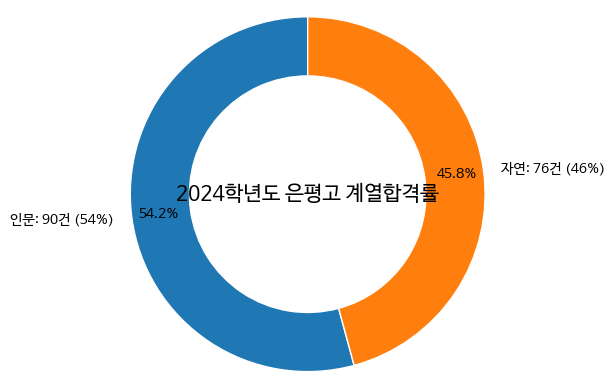

In [ ]:
import matplotlib.pyplot as plt



# 계열별 합격자수 - 공통, 예체능을 인문으로 통합
from tabulate import tabulate

# 지역, 최종, ace대학 제외
df_4year = df[(df.최종 == '합') & ~(df.대학.str.contains("대학교"))].copy()

# Combine '공통' and '예체능' into '인문' 계열
df_4year['계열'] = df_4year['계열'].replace(['공통', '예체능'], '인문')

# Group by '계열' and calculate the ratio
result = df_4year.groupby('계열').size().reset_index(name='합격자(건)')
result['비율(%)'] = (result['합격자(건)'] / result['합격자(건)'].sum() * 100).round(0).astype(int)  # Round to the nearest integer

# Rename the columns
result = result.rename(columns={'계열': '계열', '합격자(건)': '합격자(건)', '비율(%)': '비율(%)'})



# 시각화 부분 수정
fig, ax = plt.subplots()
ax.pie(result['합격자(건)'], labels=result['계열'] + ': ' + result['합격자(건)'].astype(str) + '건 (' + result['비율(%)'].astype(str) + '%)', startangle=90, radius=1.2, autopct='%1.1f%%', pctdistance=0.85, wedgeprops=dict(width=0.4, edgecolor='w'))

# 제목 추가
plt.text(0, 0, '2024학년도 은평고 계열합격률', fontsize=15, ha='center', va='center')


#저장
path = '/content/drive/MyDrive/python/eunpyeong/result_habbul/'

plt.savefig(f'{path}pass_2024_은평고_합격률_인문자연비교.png')
plt.savefig(f'{path}pass_2024_은평고_합격률_인문자연비교.pdf')



plt.show()

In [95]:
df.groupby(by = '계열').size()

#df.groupby('계열').count() : 결과가 전체열의 빈도가 나옴

계열
공통       2
예체능    134
인문     289
자연     347
dtype: int64

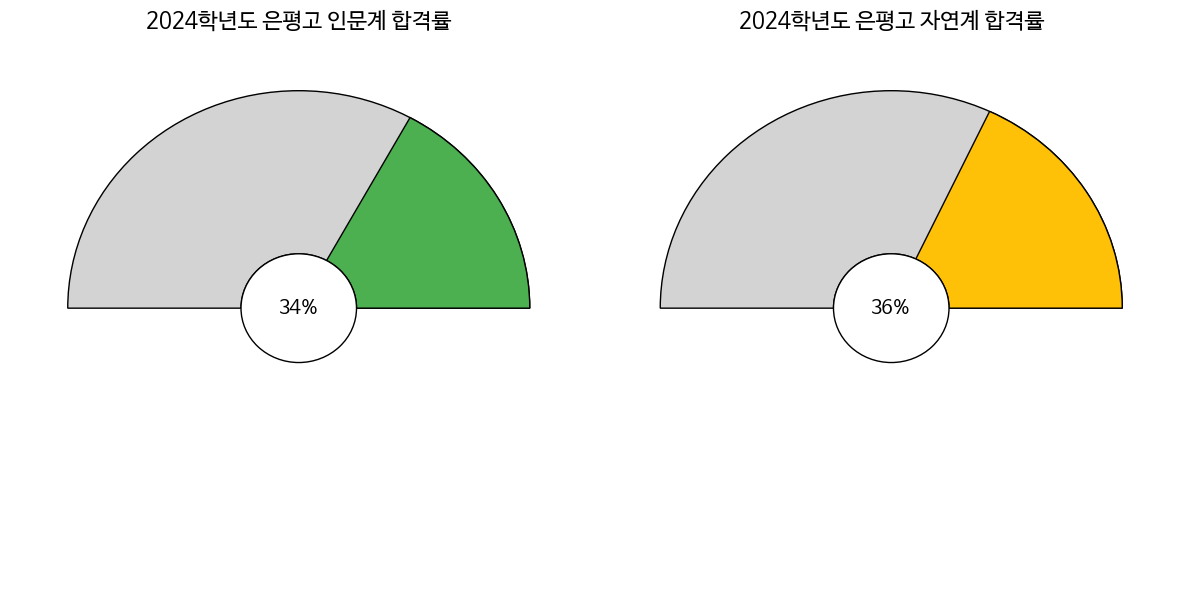

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch, Path, Wedge, Circle  # Circle 추가
import matplotlib.patches as patches


# '인문' 계열에서 '최종'이 '합'인 비율 계산
인문_합격자수 = df[(df['계열'] == '인문') & (df['최종'] == '합')].shape[0]
인문_전체 = df[df['계열'] == '인문'].shape[0]

ratio_inmun = (인문_합격자수 / 인문_전체) * 100 if 인문_전체 > 0 else 0
ratio_inmun = round(ratio_inmun)


# '자연' 계열에서 '최종'이 '합'인 비율 계산
자연_합격자수 = df[(df['계열'] == '자연') & (df['최종'] == '합')].shape[0]
자연_전체 = df[df['계열'] == '자연'].shape[0]

ratio_jayun = (자연_합격자수 / 자연_전체) * 100 if 자연_전체 > 0 else 0
ratio_jayun = round(ratio_jayun)


def draw_gauge_chart(ax, percentage, title, color):
    # 배경 원 그리기
    ax.add_patch(patches.Wedge(center=(0.5, 0.5), r=0.4, theta1=0, theta2=180, width=0.3, facecolor='lightgrey', edgecolor='black'))

    # 비율에 따른 원 그리기
    if percentage > 0:
        ax.add_patch(patches.Wedge(center=(0.5, 0.5), r=0.4, theta1=0, theta2=180 * percentage / 100, width=0.3, facecolor=color, edgecolor='black'))

    # 가운데 원(도넛 형태 만들기)
    ax.add_patch(Circle((0.5, 0.5), 0.1, transform=ax.transAxes, facecolor='white', edgecolor='black'))

    # 텍스트 및 타이틀 추가
    ax.text(0.5, 0.5, f'{percentage}%', horizontalalignment='center', verticalalignment='center', fontsize=14, transform=ax.transAxes)
    ax.set_title(title, fontsize=16)

    # 축 및 눈금 제거
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')


# 각 계열의 비율
ratios = {'인문': ratio_inmun, '자연': ratio_jayun}
colors = {'인문': '#4CAF50', '자연': '#FFC107'}

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

for ax, (title, percentage) in zip(axs, ratios.items()):
    draw_gauge_chart(ax, percentage, f'2024학년도 은평고 {title}계 합격률', colors[title])

plt.tight_layout()

#저장
path = '/content/drive/MyDrive/python/eunpyeong/result_habbul/'

plt.savefig(f'{path}pass_2024_은평고_합격률_계열별합격률.png')
plt.savefig(f'{path}pass_2024_은평고_합격률_계열별합격률.pdf')

plt.show()

In [ ]:
##1등급대 학생명단

df_one = df[(df['전과목'] >=1) & (df['전과목'] < 2)]
df_one = df_one.drop_duplicates('이름')
df_one = df_one[['이름', '전과목']].sort_values(by = '전과목')
df_one

In [ ]:
##1등급대 합격자 학생

df_one = df[(df['전과목'] >=1) & (df['전과목'] < 2) & (df['최종'] == '합')]
#df_one = df_one.drop_duplicates('이름')
df_one = df_one[['이름', '전과목', '전형분류', '최종', '대학', '모집단위']].sort_values(by = '전과목')
df_one

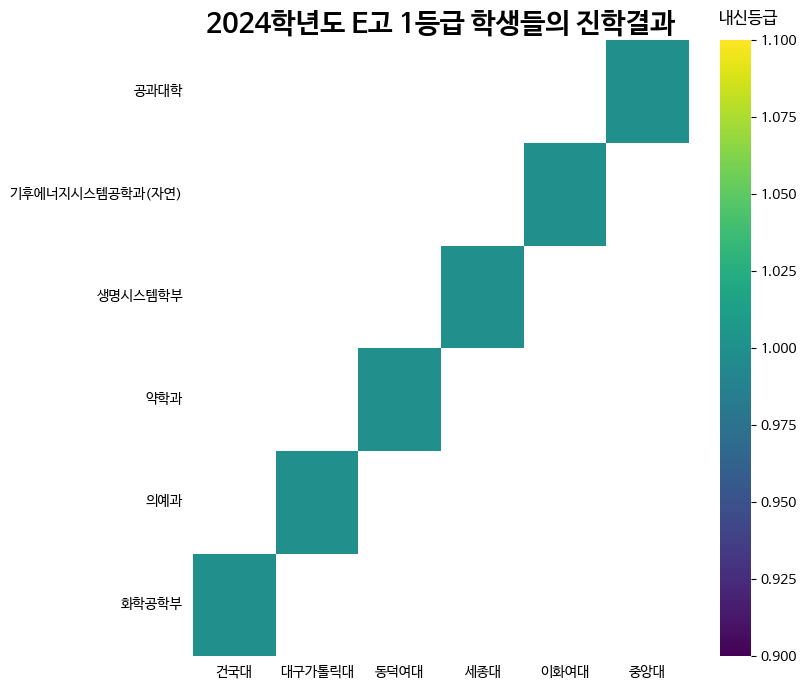

In [79]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

# 데이터 프레임 예시 생성, 실제 데이터(df_one)에 맞추어 조정 필요
# df_one = pd.DataFrame(...)

plt.figure(figsize=(8, 8))
plt.title('2024학년도 E고 1등급 학생들의 진학결과',fontsize = 20, fontweight='bold')  # 제목 설정


# 그룹화 및 모집단위별 카운트, 실제 데이터에 맞춰서 df_one을 사용
df_2dhist = pd.DataFrame({
    x_label: grp['모집단위'].value_counts()
    for x_label, grp in df_one.groupby('대학')
})

# 히트맵 생성
#ax = sns.heatmap(df_2dhist, cmap='viridis', annot=True, fmt=".2f")
ax = sns.heatmap(df_2dhist, cmap='viridis')

# 히트맵 상단에 '내신등급' 텍스트 추가
# 'x'와 'y'는 텍스트가 위치할 좌표입니다. 'ha'는 가로 정렬 방식을, 'va'는 세로 정렬 방식을 지정합니다.
plt.text(x=1.12, y=1.02, s='내신등급', fontsize=12, ha='center', va='bottom', transform=ax.transAxes)


plt.tick_params(axis='both',  # 'both'는 x축과 y축 모두에 적용됩니다.
                which='both',  # 'both'는 주요(major) 및 부차적(minor) tick 모두에 적용됩니다.
                bottom=False,  # x축의 하단 tick을 삭제합니다.
                top=False,    # x축의 상단 tick을 삭제합니다.
                left=False,   # y축의 왼쪽 tick을 삭제합니다.
                right=False,  # y축의 오른쪽 tick을 삭제합니다.
                labelbottom=True,  # x축 라벨은 유지합니다.
                labelleft=True)  # y축 라벨 유지



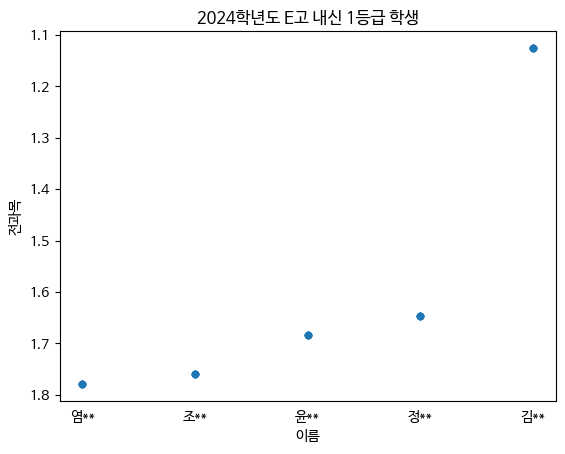

In [89]:
# prompt: df_one DataFrame 사용: x축에 이름, y축에 전과목

df_one = df[(df['전과목'] >=1) & (df['전과목'] < 2)]
# df_one = df_one.drop_duplicates('이름')
df_one = df_one[['이름', '전과목', '전형분류', '최종', '대학', '모집단위']].sort_values(by='전과목', ascending=False)

# x축 이름 수정
df_one['이름'] = df_one['이름'].apply(lambda x: x[0] + '*' * (len(x) - 1))

# 그래프 생성
ax = df_one.plot.scatter(x='이름', y='전과목')

# 제목 추가
ax.set_title('2024학년도 E고 내신 1등급 학생')

# y축 방향 반대로 설정
ax.invert_yaxis()


plt.tick_params(axis='both',  # 'both'는 x축과 y축 모두에 적용됩니다.
                which='both',  # 'both'는 주요(major) 및 부차적(minor) tick 모두에 적용됩니다.
                bottom=False,  # x축의 하단 tick을 삭제합니다.
                top=False,    # x축의 상단 tick을 삭제합니다.
                left=True,   # y축의 왼쪽 tick을 삭제합니다.
                right=False,  # y축의 오른쪽 tick을 삭제합니다.
                labelbottom=True,  # x축 라벨은 유지합니다.
                labelleft=True)  # y축 라벨 유지


In [ ]:
#특정대(ex: 서,연,고)는 제외하고 특정대는 포함하는 대학의 합격자수)

ace_a = ['서울대', '연세대', '고려대']
ace_b = ['서강대', '성균관대', '한양대']


#지역
seoul_df = df[df.지역 == '서울']
seoul_df

#ace제외하는 df: ~이 not의 의미
seoul_other_df = seoul_df[~seoul_df['대학'].isin(ace_a) & seoul_df['대학'].isin(ace_b) & (seoul_df['최종'] == '합')]
seoul_other_df

In [ ]:
#특정대(ex: 서강대를 제외한 대학의 합격자수)

ace_b = ['서강대', '성균관대', '한양대']


#지역
seoul_df = df[df.지역 == '서울']
seoul_df

#ace제외하는 df: ~이 not의 의미
seoul_other_df = seoul_df[seoul_df['대학'].isin(ace_b) & ~seoul_df['대학'].str.contains('서강대')  & (seoul_df['최종'] == '합')]
seoul_other_df

In [ ]:
df_lee = df[(df['이름'] == '홍길동')][['이름', '지원시기', '전형분류', '대학', '모집단위', '최종', '전과목', '등급수능']]
print(df_lee)

In [ ]:
# '지원시기'열의 값 변경: 가,나
df['지원시기'] = df['지원시기'].replace({'가': '정시', '나': '정시', '다': '정시', '정시1차':'정시',
                                       '수시1차': '수시', '수시2차': '수시'})

# 지원시기와 최종의 빈도 및 비율 계산
지원시기_빈도 = df['지원시기'].value_counts()
최종_빈도 = df['최종'].value_counts()

# 빈도 출력
print("지원시기 빈도:")
print(지원시기_빈도)
print("\n최종 빈도:")
print(최종_빈도)

# 비율 계산 및 출력
print("\n지원시기 비율:")
print(지원시기_빈도 / 지원시기_빈도.sum())
print("\n최종 비율:")
print(최종_빈도 / 최종_빈도.sum())


In [ ]:
#지원시기별 빈도 계산
frequency = df.groupby('지원시기').size().reset_index(name='빈도')
print(frequency)